In [2]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
import os

## Creating Vocab dictionary and caption preprocessing

In [4]:
df=pd.read_csv('../input/flickr-image-dataset/flickr30k_images/results.csv',delimiter='|')

df.head()

df.iloc[0]

id=df['image_name'].values

id.shape

comment=df[' comment'].values

comment.shape

comment[5]

def sentence_cleaning(sentence):
    try:
        sentence=sentence.lower()
        sentence=re.sub('[^a-z]+',' ',sentence)
        sentence=sentence.split()
        sentence=[s for s in sentence if len(s)>1]
        sentence=' '.join(sentence)
        return(sentence)
    except:
        return(sentence_cleaning('A dog runs across the grass .'))

vocab_dic={}
for i in range(comment.shape[0]):
    if id[i] not in vocab_dic:
        vocab_dic[id[i]]=[]
    sen=sentence_cleaning(comment[i])
    vocab_dic[id[i]].append(sen)

len(vocab_dic)

print(vocab_dic['1000092795.jpg'])

word_dic={}

for i in vocab_dic:
    for j in vocab_dic[i]:
        l=j.split()
        for k in l:
            if k not in word_dic:
                word_dic[k]=1
            else:
                word_dic[k]+=1

print(len(word_dic))

final_words=[x for x in word_dic if word_dic[x]>10]

print(len(final_words))

for i in vocab_dic:
    for j in range(len(vocab_dic[i])):
        vocab_dic[i][j]='startseq '+vocab_dic[i][j]+' endseq'

s=1
word_to_idx={}
idx_to_word={}
for i in final_words:
    word_to_idx[i]=s
    idx_to_word[s]=i
    s+=1

print(len(word_to_idx))

### Two Special words
word_to_idx['startseq']=5119
word_to_idx['endseq']=5120
idx_to_word[5119]='startseq'
idx_to_word[5120]='endseq'

len(word_to_idx)

vocab_size=len(word_to_idx)+1 # adding one for 0 because that will also in our vector

max_len=20

['two young guys with shaggy hair look at their hands while hanging out in the yard', 'two young white males are outside near many bushes', 'two men in green shirts are standing in yard', 'man in blue shirt standing in garden', 'two friends enjoy time spent together']
18054
5118
5118


In [5]:
import pickle
with open('saved_dictionary2.pkl', 'wb') as f:
    pickle.dump(idx_to_word, f)
        
with open('saved_dictionary2.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

## Image data preprocessing

In [6]:
model=ResNet50(weights='imagenet',input_shape=(224,224,3))

2022-08-10 07:05:02.512330: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


102981632/102967424 [==============================] - 3s 0us/step


In [7]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
new_model=Model(model.input,model.layers[-2].output)
new_model.save('resnet.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [9]:
def preprocess_img(path):
    img=image.load_img(path,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)#mormalizing the img
    return img

In [10]:
img=preprocess_img('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/10002456.jpg')

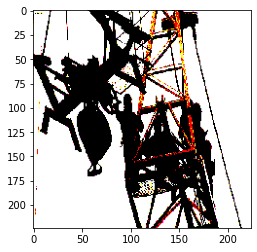

In [11]:
plt.imshow(img[0])

In [12]:
def encode_img(path):
    img=preprocess_img(path)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    return feature_vector
    

In [13]:
train_description['1244140539_da4804d828']

NameError: name 'train_description' is not defined

In [14]:
encoded_img_dic={}
s=0
for i in vocab_dic:
    path='../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'+i
    encoded_img_dic[i]=encode_img(path)
    s+=1
    if s%100==0:
        print(s)

2022-08-10 07:06:14.817220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [16]:
np.save('encoded_img_dic.npy',encoded_img_dic)

In [21]:
encoded_img_dic = np.load('../input/enco-dic/encoded_img_dic.npy',allow_pickle=True)

In [22]:
!ls -l --b=M  ./encoded_img_dic.npy | cut -d " " -f5

251M


## Custom Data Generator

In [23]:
def data_generator(train_description,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size):
    X1,X2,y=[],[],[]
    n=0
    while True:
        for key,desc_list in train_description.items():
            n+=1
            encoding_of_photo=encoded_img_dic[key]
            for desc in desc_list:
                seq=[word_to_idx[i] for i in desc.split() if i in word_to_idx]
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    
                    
                    X1.append(encoding_of_photo)
                    X2.append(xi)
                    y.append(yi)
                if n==batch_size:
                    yield [np.array(X1),np.array(X2)],np.array(y)
                    X1,X2,y=[],[],[]
                    n=0

In [26]:
with open('../input/glove6b50dtxt/glove.6B.50d.txt',encoding='utf8') as f:
    glove_data=f.read()

len(glove_data)

type(glove_data)

glove_data=glove_data.split('\n')

type(glove_data)

len(glove_data)

glove_data=glove_data[:-1]

len(glove_data)

glove_data[0].split()[0]

embedding_index={}
for line in glove_data:
    line=line.split()
    word=line[0]
    embeding=np.array(line[1:],dtype='float')
    embedding_index[word]=embeding
    

len(embedding_index)

embedding_index['the'].shape

def get_embedding_matrix():
    dim=50
    matrix=np.zeros((vocab_size,dim))
    for word,number in word_to_idx.items():
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            matrix[word_to_idx[word]]=embedding_vector
    return matrix
    

embedding_matrix=get_embedding_matrix()

len(embedding_matrix)

embedding_matrix[word_to_idx['the']]



array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

## loading embedding matrix using numpy

In [27]:
embedding_matrix=np.load('../input/embedded-matrix/embedding_matrix.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../input/embedded-matrix/embedding_matrix.npy'

In [28]:
embedding_matrix[3]

array([-0.82599 , -0.16099 ,  0.37983 , -0.5175  ,  0.9694  , -0.5279  ,
       -0.6314  ,  0.030497, -0.96925 ,  0.10382 , -0.58422 ,  0.52794 ,
       -1.1991  ,  0.65716 ,  0.77688 , -0.021802,  1.0155  ,  0.81051 ,
       -0.40352 , -1.2479  , -1.0099  ,  0.80364 ,  0.57041 ,  0.66466 ,
        0.43629 , -1.2164  , -0.87894 ,  0.1981  ,  1.4105  , -1.5908  ,
        2.4849  ,  1.4291  ,  0.12156 ,  0.12627 ,  0.28803 ,  0.39877 ,
       -0.074783,  0.16017 ,  0.27252 , -0.4343  , -0.54678 ,  0.021834,
        0.040467,  1.0172  ,  0.56188 , -0.26641 ,  0.16002 , -0.18227 ,
       -0.35096 ,  1.0802  ])

## Model Architecture

In [32]:
encoded_img_dic['10002456.jpg']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
## For images
input_img_features=Input(shape=(2048,))
inp_img1=Dropout(0.3)(input_img_features)
inp_img2=Dense(256,activation='relu')(inp_img1)


In [34]:
vocab_size

5121

In [35]:
input_captions=Input(shape=(max_len,))
inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)

In [36]:
decoder1=add([inp_img2,inp_cap3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)

In [37]:
actual_model=Model(inputs=[input_img_features,input_captions],outputs=outputs)


In [38]:
actual_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 50)       256050      input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [39]:
actual_model.layers[2].output

<KerasTensor: shape=(None, 20, 50) dtype=float32 (created by layer 'embedding')>

In [40]:
actual_model.layers[2].set_weights([embedding_matrix])
actual_model.layers[2].trainable=False

In [41]:
actual_model.compile(loss='categorical_crossentropy',optimizer='adam')

## Training the Model

In [42]:
epochs=10
batch_size=3
steps=len(vocab_dic)//batch_size

In [43]:
def train():
    for i in range(epochs):
        generator=data_generator(vocab_dic,vocab_size,word_to_idx,encoded_img_dic,max_len,batch_size)
        actual_model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        actual_model.save('./Models/model'+str(i)+'.h5')
        

In [44]:
os.mkdir('Models')

In [48]:
from keras.models import load_model

In [45]:
train()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
max_len

20

## Predicting the caption using the trained model

In [51]:
model=ResNet50(weights='imagenet',input_shape=(224,224,3))
new_model=Model(model.input,model.layers[-2].output)
# actual_model =  Model.load_model('./model_final_30k.h5')
# new_model =  Model.load_model('./resnet.h5')

In [52]:
def predict_caption(img):
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)
    feature_vector=new_model.predict(img)
    feature_vector=feature_vector.reshape((1,2048,1))
    in_text='startseq'
    for i in range(max_len):
        seq=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        seq=pad_sequences([seq],maxlen=max_len,padding='post')
        y_pred=actual_model.predict([feature_vector,seq])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_text+=' '+word
        
        if word=='endseq':
            break
    final_caption=in_text.split()[1:-1]
    final_caption=' '.join(final_caption)
    return final_caption

'stone stone stone stone stone stone stone stone stone stone stone stone stone stone stone stone stone stone stone'

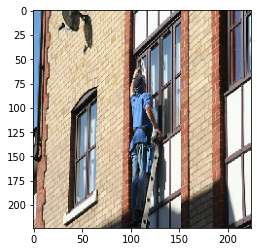

In [55]:
path = '../input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000344755.jpg'
img=image.load_img(path,target_size=(224,224,3))
img=image.img_to_array(img)
plt.imshow(img/255)
predict_caption(img)

In [ ]:
plt.imshow(img)

In [ ]:
ls -l --b=M  ./Models/model5.h5 | cut -d " " -f5

In [ ]:
actual_model.save('model_final_30k.h5')